[[2230 1905]
 [1874 2223]]
              precision    recall  f1-score   support

         1.0       0.54      0.54      0.54      4135
         2.0       0.54      0.54      0.54      4097

    accuracy                           0.54      8232
   macro avg       0.54      0.54      0.54      8232
weighted avg       0.54      0.54      0.54      8232

[[3225  910]
 [2757 1340]]
              precision    recall  f1-score   support

         1.0       0.54      0.78      0.64      4135
         2.0       0.60      0.33      0.42      4097

    accuracy                           0.55      8232
   macro avg       0.57      0.55      0.53      8232
weighted avg       0.57      0.55      0.53      8232

[[2357 1778]
 [1805 2292]]
              precision    recall  f1-score   support

         1.0       0.57      0.57      0.57      4135
         2.0       0.56      0.56      0.56      4097

    accuracy                           0.56      8232
   macro avg       0.56      0.56      0.56    

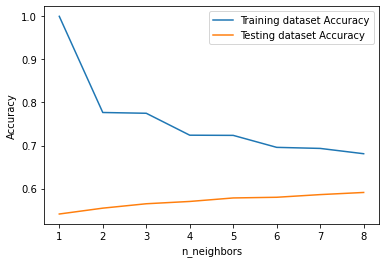

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np 
from numpy import genfromtxt
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler

data = genfromtxt("C:/Users/Usuario/Downloads/PDI Exercicios/Python Scripts/datasetTest/data.txt", delimiter=',')

labels = data[:, 12]
features = data[:, 0:12]

X = features
y = labels

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, random_state=42)

scalerObject = MinMaxScaler()

scalerObject.fit(XTrain)

scaledXTrain = scalerObject.transform(XTrain)
scaledXTest = scalerObject.transform(XTest)

neighbors = np.arange(1, 9)
trainAccuracy = np.empty(len(neighbors))
testAccuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledXTrain, yTrain)

    predictions = knn.predict(scaledXTest)

    print(confusion_matrix(yTest, predictions))

    print(classification_report(yTest, predictions))

    # Compute traning and test data accuracy
    trainAccuracy[i] = knn.score(scaledXTrain, yTrain)
    testAccuracy[i] = knn.score(scaledXTest, yTest)

# Generate plot
plt.plot(neighbors, trainAccuracy, label='Training dataset Accuracy')
plt.plot(neighbors, testAccuracy, label='Testing dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()
